In [1]:
# personal problems
%config Completer.use_jedi = False

In [2]:
import keras
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\danya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\danya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\danya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\danya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## load dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train[0].max(), x_test[0].max())
print(y_train[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
255 255
5


## visualize

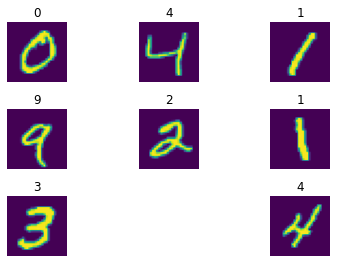

In [5]:
for i in range(3):
    for j in range(3):
        k = i * 3 + j + 1
        plt.subplot(3, 3, k)
        plt.imshow(x_train[k])
        plt.title(y_train[k])
        plt.tight_layout()
        plt.axis(False)
plt.show()

## Add bg images

(-0.5, 27.5, 27.5, -0.5)

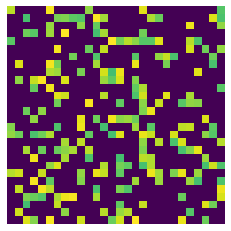

In [6]:
def get_noise(p=0.7):
    rand = np.random.rand(28, 28)
    return np.where(rand > p, rand, 0) * 255
plt.imshow(get_noise())
plt.axis(False)

In [7]:
x_train_noise = np.array([get_noise() for i in range(10000)])
x_test_noise = np.array([get_noise() for i in range(5000)])

In [8]:
print(x_train_noise.shape, x_test_noise.shape)

(10000, 28, 28) (5000, 28, 28)


In [9]:
x_train = np.concatenate((x_train, x_train_noise), 0)
x_test = np.concatenate((x_test, x_test_noise))

In [10]:
y_train = np.concatenate((y_train, 10*np.ones((10000,))), 0)
y_test = np.concatenate((y_test, 10*np.ones((5000,))), 0)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(70000, 28, 28) (70000,)
(15000, 28, 28) (15000,)


In [12]:
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

## Preprocess

In [13]:
y_train = to_categorical(y_train.astype('uint8'))
y_test = to_categorical(y_test.astype('uint8'))
x_train = x_train / 255.
x_test = x_test / 255.
x_train.shape += (1,)
x_test.shape += (1,)

In [14]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train[0].max(), x_test[0].max())
print(y_train[0])
print()
print(x_train.max())
print(y_test[0])

(70000, 28, 28, 1) (70000, 11)
(15000, 28, 28, 1) (15000, 11)
1.0 0.996078431372549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

1.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Model

In [15]:
model = keras.Sequential(name='MNIST Model')
model.add(keras.layers.Conv2D(32, 3, padding='same', 
                              input_shape=(28, 28, 1), 
                              activation='relu', name='conv2d_1'))
model.add(keras.layers.MaxPool2D(2, name='max_pool1'))
model.add(keras.layers.Conv2D(32, 3, padding='same', 
                              activation='relu', name='conv2d_2'))
model.add(keras.layers.MaxPool2D(2, name='max_pool2'))
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation='relu', name='fc_1'))
model.add(keras.layers.Dense(11, activation='softmax', name='fc_2'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Train

In [17]:
history = model.fit(x_train, y_train, validation_data=(x_test[1000:], y_test[1000:]), epochs=5)

Instructions for updating:
Use tf.cast instead.
Train on 70000 samples, validate on 14000 samples
Epoch 1/5
70000/70000 [==============================] - 38s 544us/step - loss: 0.0903 - accuracy: 0.9725 - val_loss: 0.0911 - val_accuracy: 0.9701: 0. - ETA: 34s - loss: 0. - ETA: 31s - loss: 0.2075 - accuracy: 0. - ETA: - ETA: 28s - loss: 0.1727 - accuracy: - ETA: 27s - loss: 0.1679 - accuracy:  - ETA: 27s - loss: 0.1653 - accuracy: 0. - ETA: 26s - loss: 0.1654 - accuracy:  - ETA: 26s - loss: 0.1619 - accuracy: 0.95 - ETA: 26s - loss: 0.1611 - ac - ETA: 25s - loss: 0.1541 - accuracy: - ETA: 24s - loss: 0.1512 - accurac - ETA: 24s - loss: 0.1473 - accuracy: 0.954 - ETA: 24s - loss: 0.1470 - accuracy: 0 - ETA: 23s - loss: 0.1444 - accuracy: 0. - ETA: 23s - loss: 0.1424 - accuracy: 0.9 - ETA: 23s - loss: 0.1415 -  - ETA: 22s - loss: 0.1375 - accuracy: 0.9 - ETA: 21s - loss: 0.1369 - accuracy: 0. - - ETA: 19s - loss: 0.1259 - accuracy - ETA: 18s - loss: 0.1240 - accuracy: 0.9 - ETA: 18s - lo

## Analysis

In [18]:
history.history

{'val_loss': [0.09106729655599753,
  0.03104689655974133,
  0.040080704434833025,
  0.027226394373801928,
  0.02818636837773582],
 'val_accuracy': [0.9701428413391113,
  0.9900000095367432,
  0.9884285926818848,
  0.9922142624855042,
  0.9910714030265808],
 'loss': [0.09031166624747483,
  0.04101412035949428,
  0.03167119535978667,
  0.024732405044783082,
  0.020866827776509205],
 'accuracy': [0.9724714, 0.9874714, 0.9905, 0.9921714, 0.9934857]}

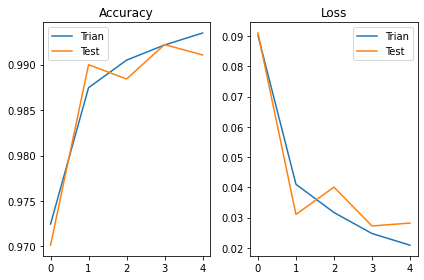

In [19]:
# plot accuracy
plt.subplot(1, 2, 1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Trian', 'Test'])

# plot loss
plt.subplot(1, 2, 2)
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Trian', 'Test'])

plt.tight_layout()
plt.show()

### Make no sense to perform analysis actually

## Validation

In [20]:
model.evaluate(x_test[:1000], y_test[:1000])

1000/1000 [==============================] - 0s 191us/step


[0.02235664910171181, 0.9940000176429749]

# Conclusion
## 99.4%

## Save model
yeah, pickle isn't best way of doing it, but it's so much easier

In [21]:
# old way. Don't do it
import pickle
f = open('MNIST_model.pickle', 'wb')
pickle.dump(model, f)
f.close()

In [2]:
model.save('MNIST_model.h5')